## Exploratory data Analysis(EDA) for Haberman cancer survival status

### Description:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

* Number of DataPoints: 306
* Number of Features: 4 (including the class)

### Feature Information:

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class) 
  * 1(survived) = the patient survived 5 years or longer.
  * 2(died) = the patient died within 5 year.

### 1. High level statistics:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [21]:
haber = pd.read_csv('haberman.csv')

In [22]:
print('Total Datapoints:',haber.shape[0],\
      '\nTotal Features:',haber.shape[1],'\n')

print('Features:')
for val, col in enumerate(haber.columns):
    print(val+1,':',col)

Total Datapoints: 306 
Total Features: 4 

Features:
1 : age
2 : year
3 : nodes
4 : status


### Data-points per class:

In [23]:
print('Number of classes:', haber['status'].unique().size,'\n')

#Mapping target attribute numeric values to string values
haber['status'] = haber['status'].map({ 1:'survived', 2:'died' })

print('DataPoints per class:')
print(haber['status'].value_counts())

Number of classes: 2 

DataPoints per class:
survived    225
died         81
Name: status, dtype: int64


### Observations:
1. Based on datapoints per class it's an imbalanced dataset.

### 2. Objective:
To classify whether a patient will survive 5 and more years or died with in 5 years from the year of treatment based on the given features:
 * Age,
 * Year of operation and 
 * Axillary lymph nodes.

### 3. Univariate analysis: 

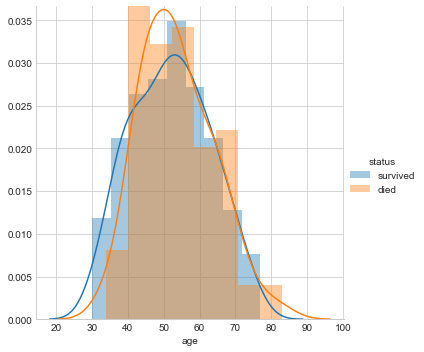

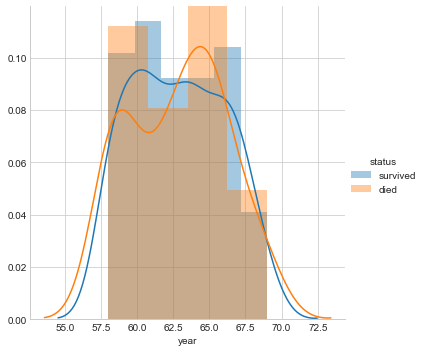

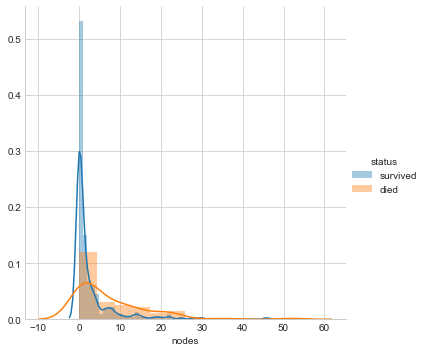

In [24]:
import warnings
warnings.filterwarnings('ignore')

#PDF
sns.set_style('whitegrid')
for col in haber.columns[:-1]:
    sns.FacetGrid(haber, hue='status', size=5)\
    .map(sns.distplot, col).add_legend()
plt.show()
plt.close()

### Observations:

1. As seen above from "age" and "year" plots it's hard to distinguish patient status as both classes overlap most probably.
2. It can be seen that patients survived more than 5 years is dense from 0 to 5(approx) axillary "nodes". This feature which seems to be useful.  

****************************** survived ******************************
PDF: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
CDF: [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
Bin edges: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
****************************** died ******************************
PDF: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
CDF: [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]
Bin edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


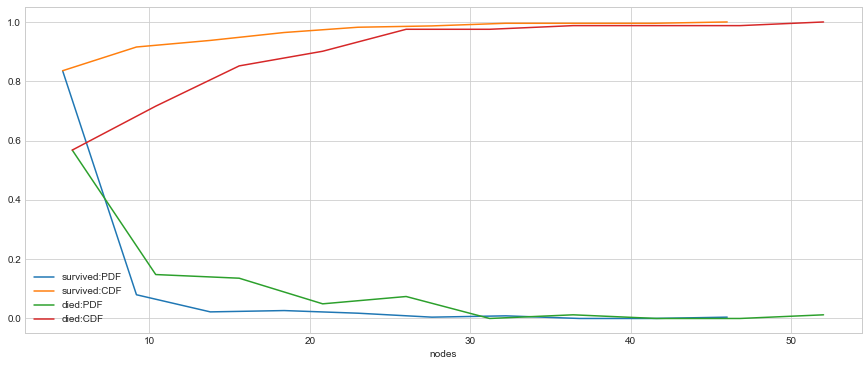

In [25]:
#CDF
plt.figure(1, figsize=(15, 6))
for val in haber['status'].unique():
    counts, bin_edges = np.histogram(haber[ haber['status']==val ]['nodes'],\
                                     bins=10, density = True)
    print('*'*30,val,'*'*30)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    
    
    print('PDF:',pdf)
    print('CDF:',cdf)
    print('Bin edges:',bin_edges)

    plt.plot(bin_edges[1:], pdf, label='{}:PDF'.format(val))
    plt.plot(bin_edges[1:], cdf, label='{}:CDF'.format(val))
    
plt.legend()
plt.xlabel('nodes')
plt.show()
plt.close()

### Observations:
1. 91% of patients who survived more than 5 years have less than 10 positive axillary nodes.
2. 90% of patients who survived less than 5 years have more than 15 positive axillary nodes.

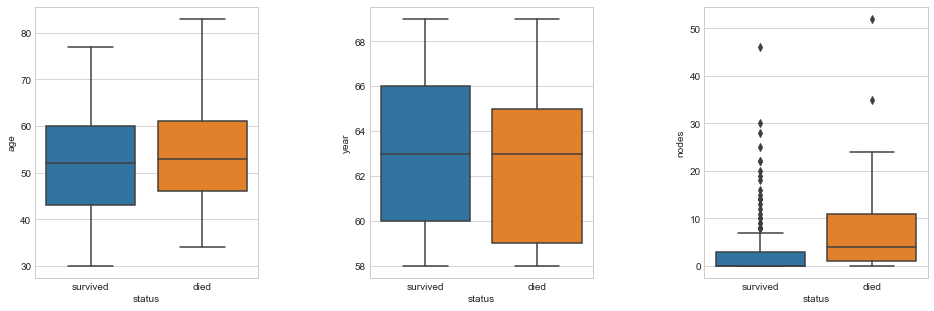

In [26]:
#Box Plots and whiskers
figure, axes = plt.subplots(1,3, figsize=(16,5))

for val, col in enumerate(haber.columns[:-1]): 
    sns.boxplot(x='status', y=col, data=haber, ax=axes[val])

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()
plt.close()

### Observations:
1. Patients treated before 1959 have less chances of survival and those treated after 1965 have higher chances of survival   

****************************** survived ******************************
PDF: [0.16       0.21777778 0.32888889 0.20444444 0.08888889]
CDF: [0.16       0.37777778 0.70666667 0.91111111 1.        ]
Bin edges: [30.  39.4 48.8 58.2 67.6 77. ]
****************************** died ******************************
PDF: [0.16049383 0.39506173 0.25925926 0.14814815 0.03703704]
CDF: [0.16049383 0.55555556 0.81481481 0.96296296 1.        ]
Bin edges: [34.  43.8 53.6 63.4 73.2 83. ]


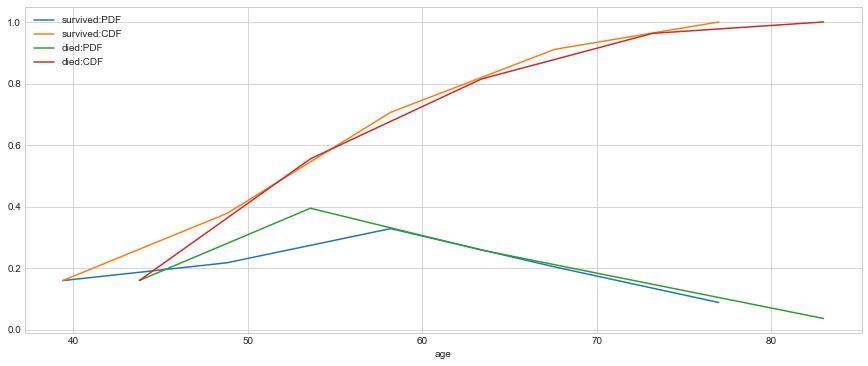

In [27]:
plt.figure(1, figsize=(15, 6))
for val in haber['status'].unique():
    counts, bin_edges = np.histogram(haber[ haber['status']==val ]['age'],\
                                     bins=5, density = True)
    print('*'*30,val,'*'*30)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    
    
    print('PDF:',pdf)
    print('CDF:',cdf)
    print('Bin edges:',bin_edges)

    plt.plot(bin_edges[1:], pdf, label='{}:PDF'.format(val))
    plt.plot(bin_edges[1:], cdf, label='{}:CDF'.format(val))
    
plt.legend()
plt.xlabel('age')
plt.show()
plt.close()

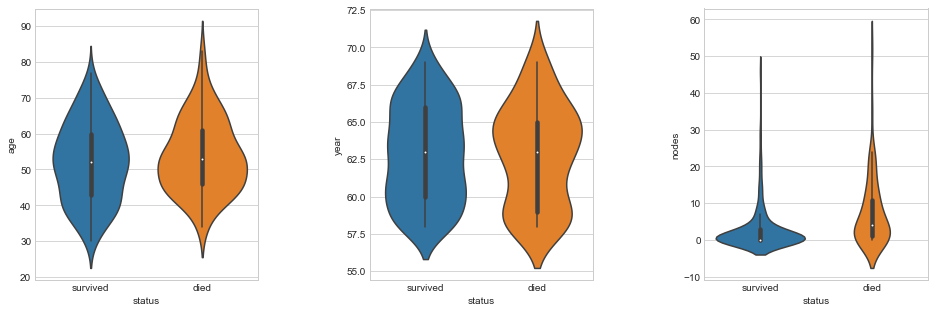

In [30]:
# Violin Plots
figure, axes = plt.subplots(1,3, figsize=(16,5))

for val, col in enumerate(haber.columns[:-1]):
    sns.violinplot(x='status', y=col, data=haber, size=8, ax=axes[val])
    
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()
plt.close()

### Observations:
1. For the patients treated between the age of 30-40, the percentage of patients survived is more than patients died.
2. And those treated between the age of 40-60 have less chances of survival.

## 4. Bi-Variate analysis:

### 2D Scatter plot

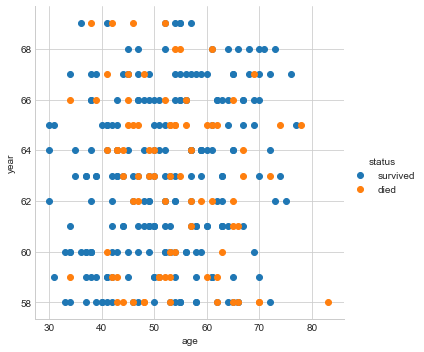

In [29]:
#Scatter Plot
sns.set_style('whitegrid')

sns.FacetGrid(haber, hue='status', size=5)\
.map(plt.scatter, 'age', 'year')\
.add_legend()

plt.show()
plt.close()

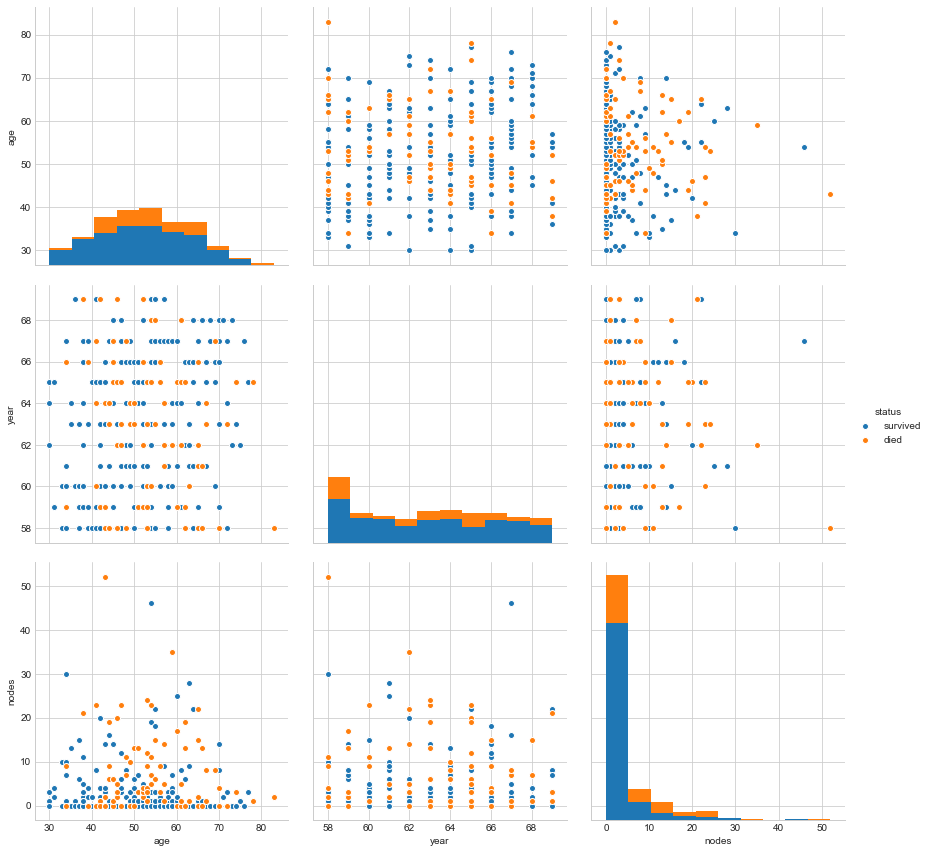

In [31]:
# Pair Plot
sns.set_style('whitegrid')

sns.pairplot(haber, hue='status', size=4)

plt.show()
plt.close()

### Observations:
1. It's hard to separate the survival status linearly from the pair plots as they(features) overlap most probably pairwise.
2. "nodes" features is useful to some extent to distinguish the survival status.
3. Some more data is required to better distinguish the survival status as it's an imbalanced dataset.

In [13]:
from statsmodels import robust

In [32]:
for col in haber.columns[:-1]:
    print('*'*30, col, '*'*30)
    print('\nMedian:')
    print( np.median(haber[ haber['status']=='survived' ][col]) )
    print( np.median(haber[ haber['status']=='died' ][col]) )
    
    print('\nQuantiles:')
    print( np.percentile(haber[ haber['status']=='survived' ][col],\
                         np.arange(25,101,25)) )
    print( np.percentile(haber[ haber['status']=='died' ][col],\
                         np.arange(25,101,25)) )
    
    print('\n99th Percentile:')
    print( np.percentile(haber[ haber['status']=='survived' ][col], 99) )
    print( np.percentile(haber[ haber['status']=='died' ][col], 99) )
    
    print('\nMedian Absolute Deviation:')
    print( robust.mad(haber[ haber['status']=='survived' ][col]) )
    print( robust.mad(haber[ haber['status']=='died' ][col]) )

****************************** age ******************************

Median:
52.0
53.0

Quantiles:
[43. 52. 60. 77.]
[46. 53. 61. 83.]

99th Percentile:
74.75999999999999
79.00000000000001

Median Absolute Deviation:
13.343419966550417
11.860817748044816
****************************** year ******************************

Median:
63.0
63.0

Quantiles:
[60. 63. 66. 69.]
[59. 63. 65. 69.]

99th Percentile:
69.0
69.0

Median Absolute Deviation:
4.447806655516806
4.447806655516806
****************************** nodes ******************************

Median:
0.0
4.0

Quantiles:
[ 0.  0.  3. 46.]
[ 1.  4. 11. 52.]

99th Percentile:
27.279999999999973
38.40000000000005

Median Absolute Deviation:
0.0
5.930408874022408


In [33]:
haber_died = haber[ haber['status']=='died' ]['nodes']

print(round(np.median(haber_died)-robust.mad(haber_died), 2),\
      round(np.median(haber_died)+robust.mad(haber_died), 2))

-1.93 9.93


### Observations:
1. The Median, Median Absolute Deviation and 90th Percentile for age & year are almost same.
2. Patients survived less than 5 years can be mostly found with axillary nodes between -1.93 to 9.93.
3. 99% of patients with axillary nodes less than or equal to 27 survived more than 5 years.